# Social Vulnerability Index (Overall)

This notebook demonstrates how to open and plot data using `rioxarray`, `stackstac` and `matplotlib`.

* Author: Aimee Barciauskas
* Lasted Updated Date: November 14, 2022

## About the data

CDC's Social Vulnerability Index (SVI) uses 15 variables at the census tract level. The data comes from the U.S. decennial census for the years 2000 & 2010, and the American Community Survey (ACS) for the years 2014, 2016, and 2018. It is a hierarchical additive index (Tate, 2013), with the component elements of CDC’s SVI including the following for 4 themes: Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing Type & Transportation.

SVI indicates the relative vulnerability of every U.S. Census tract–subdivisions of counties for which the Census collects statistical data. SVI ranks the tracts on 15 social factors, including unemployment, minority status, and disability, and further groups them into four related themes. Thus, each tract receives a ranking for each Census variable and for each of the four themes, as well as an overall ranking.

## Scientific research

The SVI Overall Score provides the overall, summed social vulnerability score for a given tract. The Overall Score SVI Grid is part of the U.S. Census Grids collection, and displays the Center for Disease Control & Prevention (CDC) SVI score. Funding for the final development, processing and dissemination of this data set by the Socioeconomic Data and Applications Center (SEDAC) was provided under the U.S. National Aeronautics and Space Administration (NASA)¹.

The Overall SVI Score describes the vulnerability in a given county tract based on the combined percentile ranking of the four SVI scores (Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing Type & Transportation). The summed percentile ranking from the four themes is ordered, and then used to calculate an overall percentile ranking, ranging from 0 (less vulnerable) to 1 (more vulnerable)². Tracts with higher Overall SVI Scores typically rank high in other SVI domains, and reveal communities that may require extra support, resources, and preventative care in order to better prepare for and manage emergency situations.

## Interpreting the data

The Overall SVI Score describes the vulnerability in a given county tract based on the combined percentile ranking of the four SVI scores (Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing Type & Transportation). The summed percentile ranking from the four themes is ordered, and then used to calculate an overall percentile ranking, ranging from 0 (less vulnerable) to 1 (more vulnerable)². Tracts with higher Overall SVI Scores typically rank high in other SVI domains, and reveal communities that may require extra support, resources, and preventative care in order to better prepare for and manage emergency situations.

## Credits

* Center for International Earth Science Information Network, (CIESIN), Columbia University. 2021. Documentation for the U.S. Social Vulnerability Index Grids. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/fjr9-a973. Accessed 13 May 2022.

* Centers for Disease Control and Prevention/ Agency for Toxic Substances and Disease Registry/ Geospatial Research, Analysis, and Services Program. CDC/ATSDR Social Vulnerability Index Database. https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/pdf/SVI2018Documentation_01192022_1.pdf


In [28]:
import rioxarray
import stackstac
from satsearch import Search
import rasterio as rio
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For running locally

If you are running this code locally, you will need to request credentials and use cognito_client to access the data.

In [30]:
# from cognito_client import CognitoClient
# import boto3
# from rasterio.session import AWSSession
# import os
# client = CognitoClient(
#     client_id='xxx',
#     user_pool_id='us-west-xxx',
#     identity_pool_id='us-west-2:xxx'
# )
# _ = client.login()

In [5]:
# # Fetch AWS Credentials
# creds = client.get_aws_credentials()

# aws_access_key_id=creds["AccessKeyId"]
# aws_secret_access_key=creds["SecretKey"]
# aws_session_token=creds["SessionToken"]

# session = boto3.Session(aws_access_key_id=aws_access_key_id, 
#                         aws_secret_access_key=aws_secret_access_key,
#                         aws_session_token=aws_session_token)

# if __name__ == "__main__":
#     rio_env = rio.Env(AWSSession(session),
#                       GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR',
#                       GDAL_HTTP_COOKIEFILE=os.path.expanduser('~/cookies.txt'),
#                       GDAL_HTTP_COOKIEJAR=os.path.expanduser('~/cookies.txt'))
#     rio_env.__enter__()

# Declare your collection of interest

You can discover available collections the following ways:

* Use the `{STAC_API_URL}/collections` API endpoint (JSON response)
* Programmatically using `pystac` (see example in the `list-collections.ipynb` notebook
* In the STAC Browser: http://delta-staging-stac-browser.s3-website-us-east-1.amazonaws.com/

In [31]:
STAC_API_URL = 'https://staging-stac.delta-backend.com/'
RASTER_ENDPOINT_URL = "https://staging-raster.delta-backend.com"
collection = 'social-vulnerability-index-overall-nopop'

## Use satsearch to discover items in the social-vulnerability-index-socioeconomic-nopop collection

In [32]:
search = Search.search(
    url=STAC_API_URL,
    collections=[collection],
    limit=10
)
items = search.items()

url is https://staging-stac.delta-backend.com/search
headers is None
kwargs is {'limit': 10, 'collections': ['social-vulnerability-index-overall-nopop']}


There are 5 items representing the 5 years of data in the collection (2000, 2010, 2014, 2016, and 2018).

In [33]:
len(items)

5

## Create an `xarray.DataArray`

In [34]:
item = items[4]
s3_link = item.assets['cog_default']['href']
da = rioxarray.open_rasterio(s3_link)
da = da.squeeze('band', drop=True)
da

<xarray.DataArray (y: 6297, x: 13353)>
[84083841 values with dtype=float32]
Coordinates:
  * x            (x) float64 -178.2 -178.2 -178.2 ... -66.98 -66.97 -66.96
  * y            (y) float64 71.38 71.37 71.36 71.35 ... 18.94 18.93 18.92 18.91
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.3999999521443642e+38
    scale_factor:  1.0
    add_offset:    0.0

/Users/aimeebarciauskas/miniconda3/lib/python3.9/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


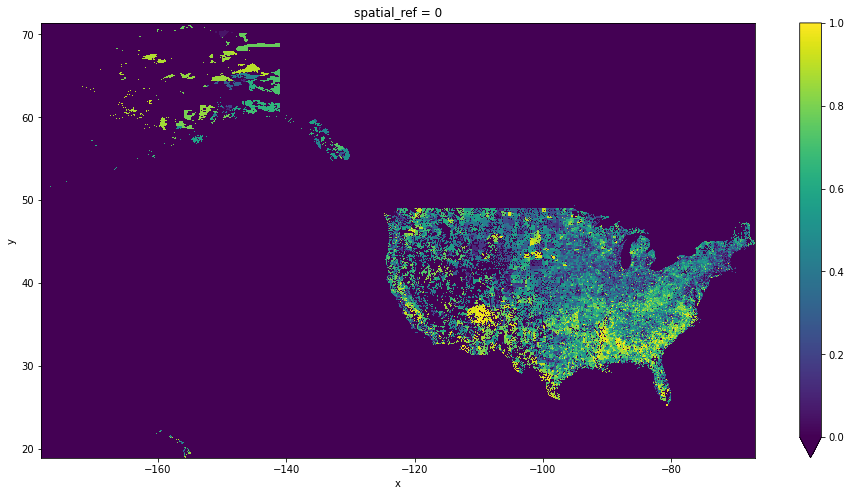

In [35]:
plt.figure(figsize=[16, 8])
da.plot(x='x', y='y', vmin=0, vmax=1)